### Approximating $x^2$ on $(0, 1)$ Using a Feedforward Neural Network in PyTorch.

Epoch 0, Loss: 0.139638
Epoch 50, Loss: 0.000267
Epoch 100, Loss: 0.000061
Epoch 150, Loss: 0.000026
Epoch 200, Loss: 0.000017
Epoch 250, Loss: 0.000011
Epoch 300, Loss: 0.000008
Epoch 350, Loss: 0.000006
Epoch 400, Loss: 0.000005
Epoch 450, Loss: 0.000004


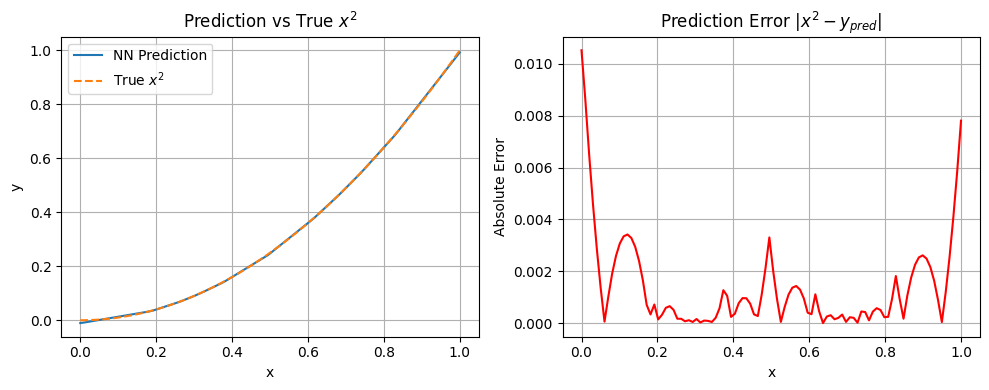

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate training data in (0, 1)
x_train = torch.linspace(0.01, 0.99, 100).unsqueeze(1)
y_train = x_train ** 2  # Target: x^2

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Setup model
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the network
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate the model
model.eval()
x_test = torch.linspace(0.0, 1.0, 100).unsqueeze(1)
y_true = x_test ** 2
y_pred = model(x_test).detach()
error = torch.abs(y_pred - y_true)

# Plot prediction and error
plt.figure(figsize=(10, 4))

# Prediction plot
plt.subplot(1, 2, 1)
plt.plot(x_test.numpy(), y_pred.numpy(), label='NN Prediction')
plt.plot(x_test.numpy(), y_true.numpy(), label='True $x^2$', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction vs True $x^2$")
plt.legend()
plt.grid(True)

# Error plot
plt.subplot(1, 2, 2)
plt.plot(x_test.numpy(), error.numpy(), color='red')
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Prediction Error $|x^2 - y_{pred}|$")
plt.grid(True)

plt.tight_layout()
plt.show()
